- The goal is to predict whether a passenger survived based on attributes such as; age, name etc.

* The goal is to train the best model you can using the training data, then make your predictions on the test data and upload them to Kaggle to see your final score

The attributes meaning::
* **PassengerId**: a unique idenfifier for each passenger
- **Survived**:0 means died and 1 means survived
- **Pclass**:passenger class
- **Name, Sex, Age**:self-explanatory
- **SibSp**:how many siblings & spouses of the passenger aboard the Titanic.
- **Parch**:how many children & parents of the passenger aboard the Titanic.
- **Ticket**:ticket id
- **Fare**:price paid(in pounds)
- **Cabin**:passenger's cabin number
- **Embarked**:where the passenger embarked the Titanic

In [21]:
import pandas as pd
test_train = pd.read_csv('titanic/test.csv')
test_train
tita_train = pd.read_csv('titanic/train.csv')
tita_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699113,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526507,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.416700,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [238]:
test_train.head(10)

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S
898,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q
899,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,NaN,S
900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,NaN,C


In [22]:
tita_train.set_index("PassengerId", inplace=True)
test_train.set_index("PassengerId", inplace=True)

In [76]:
tita_train.dropna(subset='Embarked' ,axis=0,inplace = True)
tita_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  889 non-null    int64  
 1   Pclass    889 non-null    int64  
 2   Name      889 non-null    object 
 3   Sex       889 non-null    object 
 4   Age       712 non-null    float64
 5   SibSp     889 non-null    int64  
 6   Parch     889 non-null    int64  
 7   Ticket    889 non-null    object 
 8   Fare      889 non-null    float64
 9   Cabin     202 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.3+ KB


In [77]:
X_train = tita_train.drop('Survived',axis=1).copy()
X_train.head(5)

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [79]:
y_train = tita_train['Survived'].copy()
y_train.info()

<class 'pandas.core.series.Series'>
Int64Index: 889 entries, 1 to 891
Series name: Survived
Non-Null Count  Dtype
--------------  -----
889 non-null    int64
dtypes: int64(1)
memory usage: 13.9 KB


In [ ]:
X_train.set_index('PassengerId',inplace=True)


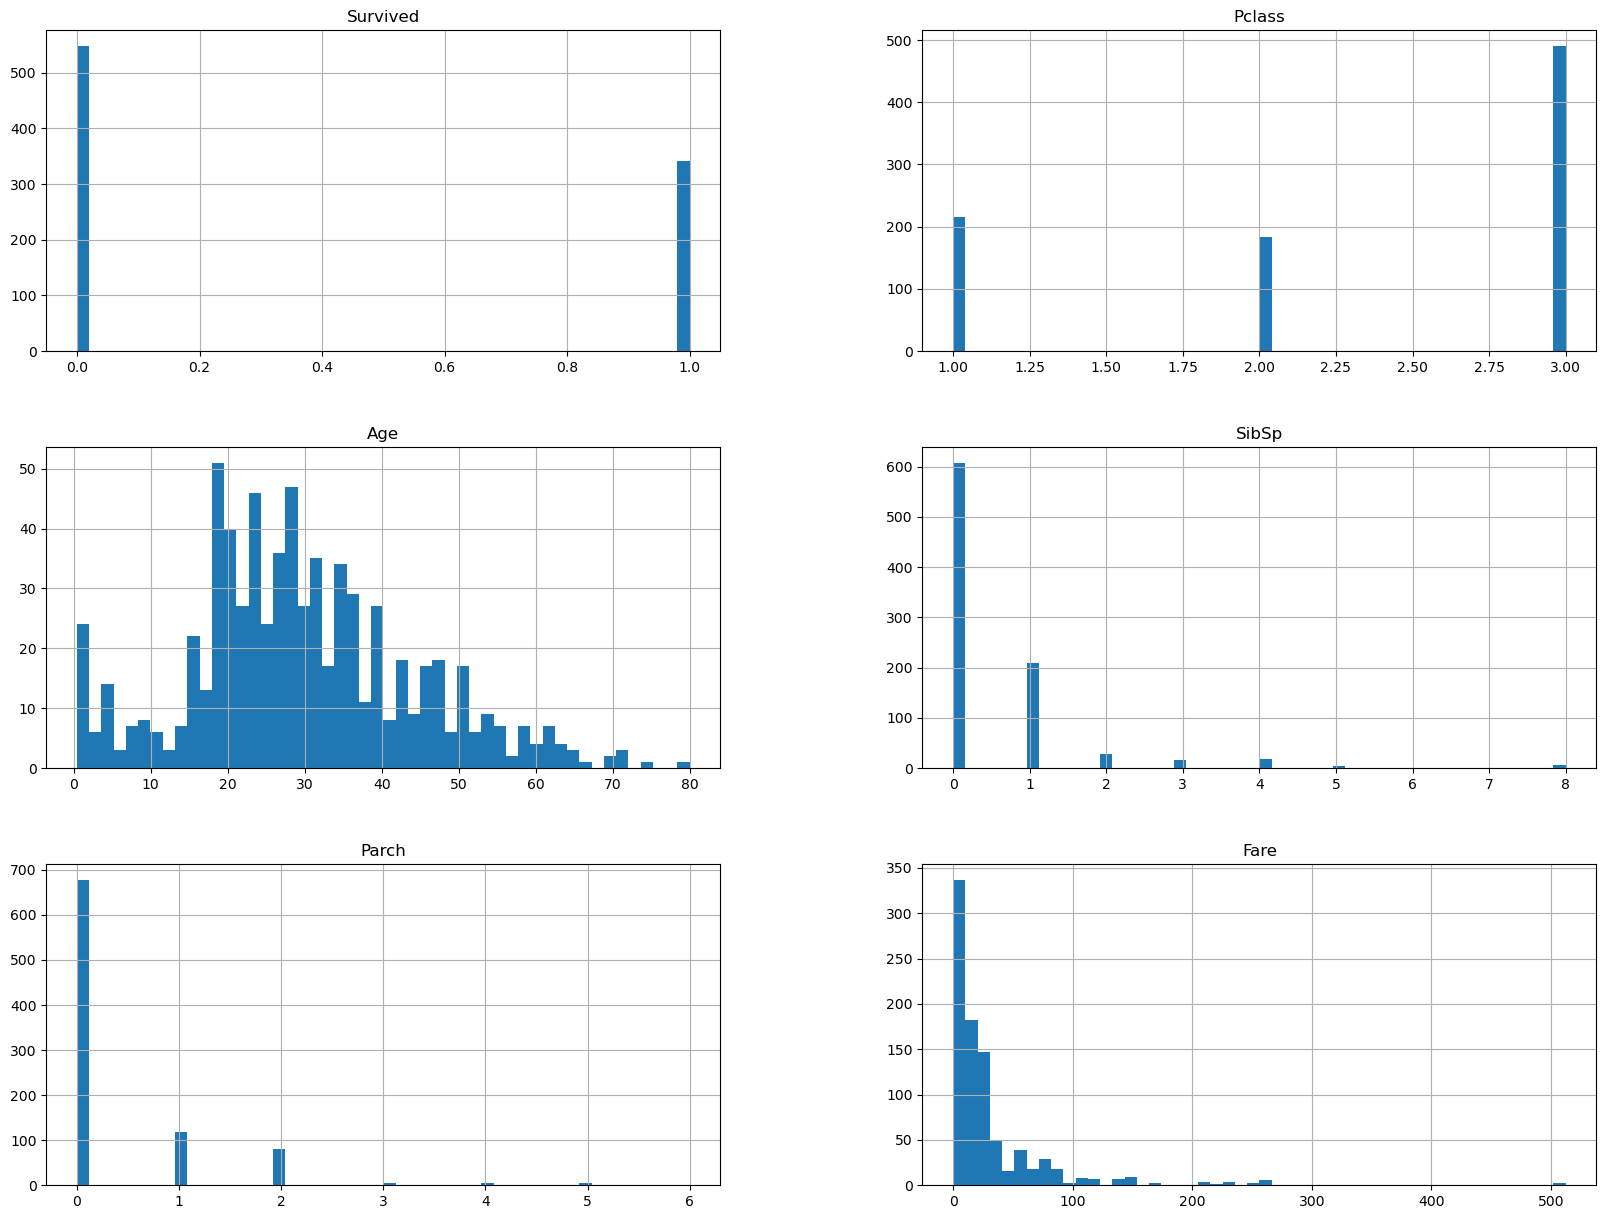

In [41]:
import matplotlib.pyplot as plt
tita_train.hist(bins=50, figsize=(20,15))
plt.show()

In [81]:
corr_matrix  = tita_train.corr()
corr_matrix['Survived'].sort_values(ascending=False)

Survived    1.000000
Fare        0.255290
Parch       0.083151
SibSp      -0.034040
Age        -0.082446
Pclass     -0.335549
Name: Survived, dtype: float64

array([[<AxesSubplot:xlabel='Fare', ylabel='Fare'>,
        <AxesSubplot:xlabel='Parch', ylabel='Fare'>,
        <AxesSubplot:xlabel='Pclass', ylabel='Fare'>,
        <AxesSubplot:xlabel='Age', ylabel='Fare'>,
        <AxesSubplot:xlabel='Survived', ylabel='Fare'>],
       [<AxesSubplot:xlabel='Fare', ylabel='Parch'>,
        <AxesSubplot:xlabel='Parch', ylabel='Parch'>,
        <AxesSubplot:xlabel='Pclass', ylabel='Parch'>,
        <AxesSubplot:xlabel='Age', ylabel='Parch'>,
        <AxesSubplot:xlabel='Survived', ylabel='Parch'>],
       [<AxesSubplot:xlabel='Fare', ylabel='Pclass'>,
        <AxesSubplot:xlabel='Parch', ylabel='Pclass'>,
        <AxesSubplot:xlabel='Pclass', ylabel='Pclass'>,
        <AxesSubplot:xlabel='Age', ylabel='Pclass'>,
        <AxesSubplot:xlabel='Survived', ylabel='Pclass'>],
       [<AxesSubplot:xlabel='Fare', ylabel='Age'>,
        <AxesSubplot:xlabel='Parch', ylabel='Age'>,
        <AxesSubplot:xlabel='Pclass', ylabel='Age'>,
        <AxesSubplot:xlabel=

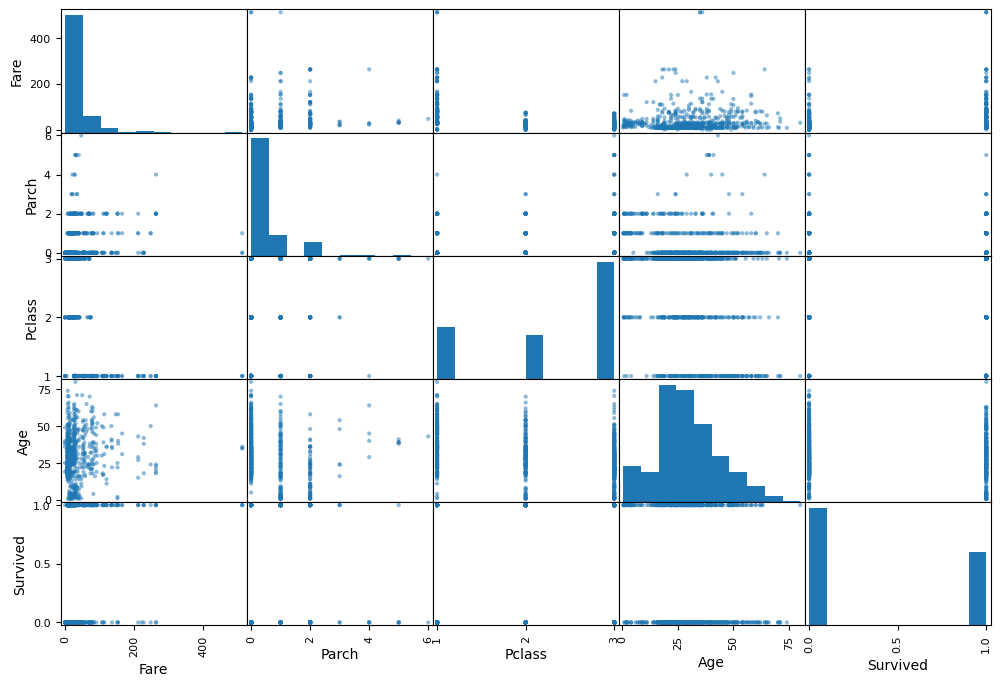

In [45]:
from pandas.plotting import scatter_matrix
attributes = ['Fare','Parch','Pclass','Age','Survived']
scatter_matrix(tita_train[attributes],figsize=(12, 8))

* **Data Cleaning**

In [ ]:
X_train.drop('Name', axis=1, inplace=True)
X_train.drop('Ticket', axis=1, inplace=True)
X_train.drop('Cabin', axis=1, inplace=True)


In [84]:
X_train_num= X_train.drop(['Sex','Embarked'],axis=1)

## Transformation Pipelines

In [85]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

num_pipeline = Pipeline([
    ('imputer',SimpleImputer(strategy='median'),),
    ('std_scaler', StandardScaler(),),
    
])

tita_train_num = num_pipeline.fit_transform(X_train_num)

In [86]:
tita_train_num


array([[ 0.82520863, -0.56367342,  0.43135024, -0.47432585, -0.50023975],
       [-1.57221121,  0.66921682,  0.43135024, -0.47432585,  0.78894661],
       [ 0.82520863, -0.25545086, -0.47519908, -0.47432585, -0.48664993],
       ...,
       [ 0.82520863, -0.10133958,  0.43135024,  2.00611934, -0.17408416],
       [-1.57221121, -0.25545086, -0.47519908, -0.47432585, -0.0422126 ],
       [ 0.82520863,  0.20688298, -0.47519908, -0.47432585, -0.49017322]])

## **Handling Text and Categorical Attributes**

## ColumnTransformer
* Handles all ncolumns together; categorical & numerical columns.

In [92]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
titanic_cats = ['Sex','Embarked']
tita_num_attribs = list(X_train_num)

full_pipeline = ColumnTransformer(
    [
        ('num',num_pipeline,tita_num_attribs),
        ('categories',OneHotEncoder(),titanic_cats)


    ]
)

titanic_dt_prepared = full_pipeline.fit_transform(X_train)



In [105]:
titanic_dt_prepared.tolist()

[[0.8252086287077022,
  -0.563673420485992,
  0.4313502389523841,
  -0.4743258521037861,
  -0.5002397510893574,
  0.0,
  1.0,
  0.0,
  0.0,
  1.0],
 [-1.5722112109038908,
  0.6692168163570447,
  0.4313502389523841,
  -0.4743258521037861,
  0.788946607905507,
  1.0,
  0.0,
  1.0,
  0.0,
  0.0],
 [0.8252086287077022,
  -0.25545086127523287,
  -0.4751990812099552,
  -0.4743258521037861,
  -0.48664993466069395,
  1.0,
  0.0,
  0.0,
  0.0,
  1.0],
 [-1.5722112109038908,
  0.4380498969489752,
  0.4313502389523841,
  -0.4743258521037861,
  0.4228611129909654,
  1.0,
  0.0,
  0.0,
  0.0,
  1.0],
 [0.8252086287077022,
  0.4380498969489752,
  -0.4751990812099552,
  -0.4743258521037861,
  -0.4841333019887193,
  0.0,
  1.0,
  0.0,
  0.0,
  1.0],
 [0.8252086287077022,
  -0.1013395816698533,
  -0.4751990812099552,
  -0.4743258521037861,
  -0.47591297302898106,
  0.0,
  1.0,
  0.0,
  1.0,
  0.0],
 [-1.5722112109038908,
  1.9021070532000812,
  -0.4751990812099552,
  -0.4743258521037861,
  0.3979464495

## Select and Train a Model

In [306]:
from sklearn import svm
svm_clf = svm.SVC(kernel='sigmoid',random_state=42)
svm_clf.fit(titanic_dt_prepared, y_train)


SVC(kernel='sigmoid', random_state=42)

In [118]:
X_train.head(20)

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,
1,3,male,22.0,1,0,7.2500,S
2,1,female,38.0,1,0,71.2833,C
3,3,female,26.0,0,0,7.9250,S
4,1,female,35.0,1,0,53.1000,S
5,3,male,35.0,0,0,8.0500,S
6,3,male,NaN,0,0,8.4583,Q
7,1,male,54.0,0,0,51.8625,S
8,3,male,2.0,3,1,21.0750,S
9,3,female,27.0,0,2,11.1333,S


In [122]:
some_data = X_train.iloc[:20]
some_labels = y_train.iloc[:20]
some_dt_prepared = full_pipeline.fit_transform(some_data)

predicts = svm_clf.predict(some_dt_prepared)


In [123]:
print(list(predicts))
print(list(some_labels))


[0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1]
[0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1]


In [124]:
from sklearn.metrics import mean_squared_error
import numpy as np
survival_pred = svm_clf.predict(titanic_dt_prepared)
svm_mse = mean_squared_error(y_train,survival_pred)
svm_rmse = np.sqrt(svm_mse)
svm_rmse

0.46230215724072315

# Evaluation Using Cross-Validation

In [156]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(svm_clf,titanic_dt_prepared, y_train, scoring='accuracy', cv = 10)
scores.mean()

0.7862487231869254

In [139]:
from sklearn.neighbors import KNeighborsClassifier
knn_clf = KNeighborsClassifier()
knn_clf.fit(titanic_dt_prepared,y_train)

KNeighborsClassifier()

In [141]:
some_dt = X_train.iloc[:20]
some_lbls= y_train.iloc[:20]
sm_dt_prepared = full_pipeline.fit_transform(some_dt)


In [143]:
predictions = knn_clf.predict(sm_dt_prepared)

/home/kasyima/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [152]:
from sklearn.metrics import mean_squared_error
knn_predicts = knn_clf.predict(titanic_dt_prepared)
knn_mse = mean_squared_error(knn_predicts,y_train)
knn_rmse = np.sqrt(knn_mse)
knn_rmse

/home/kasyima/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


0.37647348308289513

In [144]:
print(list(predictions))
print(list(some_lbls))

[0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1]
[0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1]


In [153]:
knn_scores = cross_val_score(knn_clf,titanic_dt_prepared,y_train,scoring='accuracy',cv=10,)

/home/kasyima/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/home/kasyima/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be acce

In [157]:
knn_scores.mean()

0.8087589376915219

In [158]:
from sklearn.linear_model import SGDClassifier
sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(titanic_dt_prepared,y_train)

SGDClassifier(random_state=42)

In [159]:
sm_prepared_dt = full_pipeline.fit_transform(some_dt)
sgd_pred = sgd_clf.predict(sm_prepared_dt)

In [160]:
print(list(sgd_pred))
print(list(some_lbls))

[0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1]
[0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1]


In [161]:
sgd_score = cross_val_score(sgd_clf,titanic_dt_prepared, y_train, scoring='accuracy', cv=3)


In [164]:
sgd_score.mean()

0.7728258561591895

# Confusion Matrix

* The gen' idea is to count the number of times instances of class A are classified as instnaces of class B.

In [167]:
from sklearn.model_selection import cross_val_predict
y_train_pred = cross_val_predict(sgd_clf,titanic_dt_prepared, y_train, cv=3)


In [168]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train, y_train_pred)

array([[472,  77],
       [125, 215]])

In [170]:
from sklearn.metrics import precision_score, recall_score
precision_score(y_train, y_train_pred)
recall_score(y_train, y_train_pred)

0.6323529411764706

In [171]:
from sklearn.metrics import f1_score
f1_score(y_train, y_train_pred)

0.680379746835443

* To dcd which threshold to use? 
    - U 1st need to get the decision scores of all instances in the training set using the `cross_val_predict()`.
    - specify that you want it to return decision scores instead of prediction scores.

In [175]:
y_scores = cross_val_predict(sgd_clf,titanic_dt_prepared, y_train, method='decision_function',cv=3)


* Computing precision & recall for all possible thresholds using the `precision_recall_curve`.

In [176]:
from sklearn.metrics import precision_recall_curve
precisions, recalls, thresholds = precision_recall_curve(y_train, y_scores)


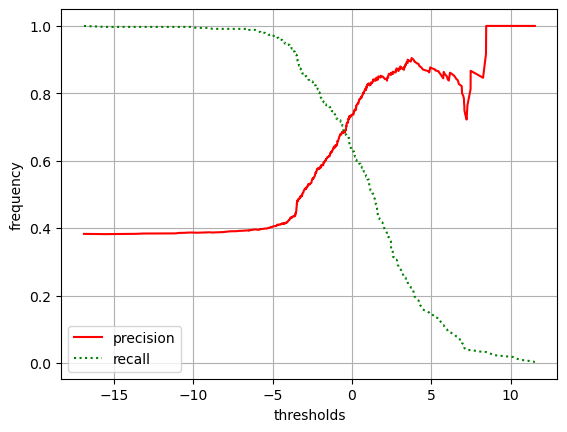

In [183]:
import matplotlib.pyplot as plt
def plot_precision_recall_curve(fpr, frs, thresh):
    plt.plot(thresh,fpr[:-1],  'r-', label='precision')
    plt.plot(thresh,frs[:-1], 'g:', label='recall')
    plt.ylabel(ylabel='frequency')
    plt.xlabel(xlabel='thresholds')
    plt.legend()
    plt.grid()
plot_precision_recall_curve(precisions, recalls, thresholds)
plt.show()

# ROC(receiver operating characteristics)

In [184]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_train,y_scores)

0.8060859316404155

In [187]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_train, y_scores)

# RandomForestClassifier

In [218]:
from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf.fit(titanic_dt_prepared, y_train)


RandomForestClassifier(random_state=42)

In [219]:
cross_val_score(rf_clf, titanic_dt_prepared, y_train, cv=3,scoring='accuracy' )

array([0.78114478, 0.82094595, 0.7972973 ])

In [220]:
y_probas_forest = cross_val_predict(rf_clf, titanic_dt_prepared,y_train, method='predict_proba',cv=3)


In [221]:
y_scores_forest = y_probas_forest[:, 1]
fpr_forest, tpr_forest, thresholds = roc_curve(y_train, y_scores_forest)

In [222]:
knn_y_scores = cross_val_predict(knn_clf, titanic_dt_prepared, y_train, cv=3)

/home/kasyima/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/home/kasyima/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be acce

In [223]:
fpr_knn, tpr_knn, thresholds = roc_curve(y_train, knn_y_scores)

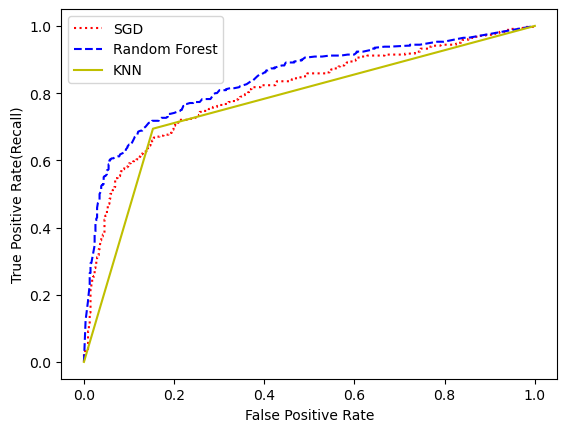

In [224]:
plt.plot(fpr, tpr, 'r:', label='SGD')
plt.plot(fpr_forest, tpr_forest, 'b--',label='Random Forest')
plt.plot(fpr_knn, tpr_knn,'y-',label='KNN')
plt.legend()
plt.ylabel(ylabel='True Positive Rate(Recall)')
plt.xlabel(xlabel='False Positive Rate')
plt.show()

In [197]:
roc_auc_score(y_train, knn_y_scores)

0.7705560912889747

In [226]:
predicts_forest = rf_clf.predict(some_dt_prepared)

In [227]:
print(list(predicts_forest))
print(list(some_lbls))

[0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1]
[0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1]


In [228]:
confusion_matrix(y_train,knn_y_scores)

array([[465,  84],
       [104, 236]])

In [210]:
y_scores_sgd= cross_val_predict(sgd_clf, titanic_dt_prepared,y_train,cv=3)

In [211]:
confusion_matrix(y_train,y_scores_sgd)

array([[472,  77],
       [125, 215]])

In [230]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(titanic_dt_prepared.astype(np.float64))
forest_scores = cross_val_score(rf_clf,X_train_scaled,y_train ,cv=10)
forest_scores.mean()


0.8121935648621041

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(titanic_dt_prepared.astype(np.float64))
knn_scores = cross_val_score(knn_clf,X_train_scaled,y_train ,cv=10)
knn_scores.mean()

In [232]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(titanic_dt_prepared.astype(np.float64))
sgd_scores = cross_val_score(sgd_clf,X_train_scaled,y_train ,cv=10)
sgd_scores.mean()

0.7424540347293156

In [312]:
from sklearn.preprocessing import StandardScaler
svm_clf = svm.SVC(gamma='auto')
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(titanic_dt_prepared.astype(np.float64))
svm_scores = cross_val_score(svm_clf,X_train_scaled,y_train ,cv=10)
svm_scores.mean()

0.8245658835546475

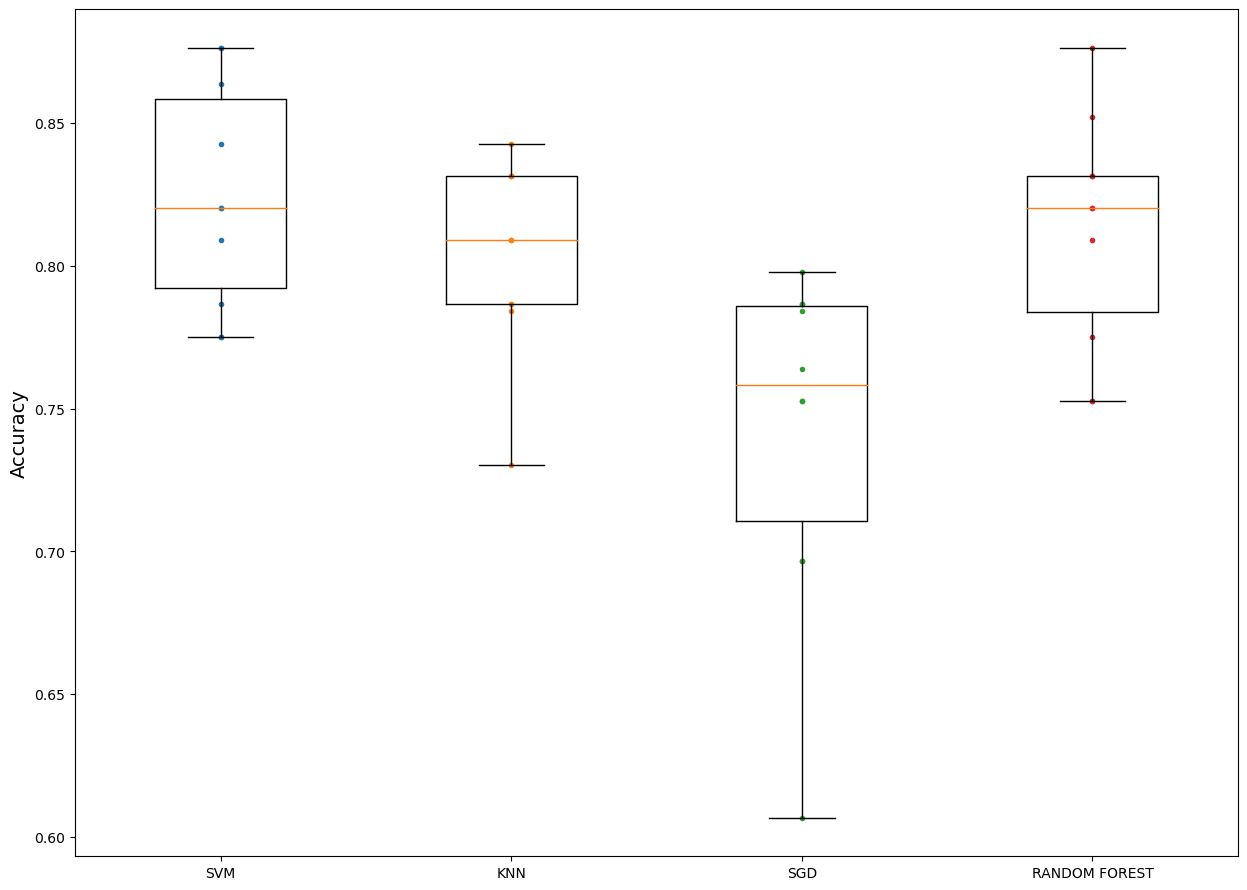

In [311]:
plt.figure(figsize=(15,11))
plt.plot([1]*10, svm_scores, '.')
plt.plot([2]*10, knn_scores, '.')
plt.plot([3]*10, sgd_scores, '.')
plt.plot([4]*10, forest_scores, '.')
plt.boxplot([svm_scores, knn_scores, sgd_scores, forest_scores],labels=("SVM","KNN","SGD","RANDOM FOREST"))
plt.ylabel(ylabel="Accuracy", fontsize=14)
plt.show()


# Test the model

In [253]:
test_train.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,
892,3,male,34.5,0,0,7.8292,Q
893,3,female,47.0,1,0,7.0000,S
894,2,male,62.0,0,0,9.6875,Q
895,3,male,27.0,0,0,8.6625,S
896,3,female,22.0,1,1,12.2875,S


In [240]:
test_train.drop(['Name','Cabin'], inplace=True, axis=1)

In [251]:
test_train.drop('Ticket',inplace=True,axis=1)

In [252]:
num_test_train = test_train.drop(['Sex','Embarked'],axis=1).copy()
num_test_train

,Pclass,Age,SibSp,Parch,Fare
PassengerId,,,,,
892,3,34.5,0,0,7.8292
893,3,47.0,1,0,7.0000
894,2,62.0,0,0,9.6875
895,3,27.0,0,0,8.6625
896,3,22.0,1,1,12.2875
...,...,...,...,...,...
1305,3,NaN,0,0,8.0500
1306,1,39.0,0,0,108.9000
1307,3,38.5,0,0,7.2500


In [255]:
from sklearn.pipeline import Pipeline
num_pipeline = Pipeline([
    ('impute',SimpleImputer(strategy='median')),
    ('scaler', StandardScaler()),
    
])
num_pipeline.fit_transform(num_test_train)

array([[ 0.87348191,  0.38623105, -0.49947002, -0.4002477 , -0.49741333],
       [ 0.87348191,  1.37137004,  0.61699237, -0.4002477 , -0.51227801],
       [-0.31581919,  2.55353682, -0.49947002, -0.4002477 , -0.46410047],
       ...,
       [ 0.87348191,  0.70147552, -0.49947002, -0.4002477 , -0.50779638],
       [ 0.87348191, -0.20485235, -0.49947002, -0.4002477 , -0.49345515],
       [ 0.87348191, -0.20485235,  0.61699237,  0.61989583, -0.23695704]])

In [270]:
from sklearn.compose import ColumnTransformer
test_categories = ['Sex', 'Embarked']
test_num_attribs = list(num_test_train)
Full_pipeline = ColumnTransformer([
    ('encoder', OneHotEncoder(sparse=False),test_categories),
    ('num', num_pipeline, test_num_attribs),
])
titanic_test_set = Full_pipeline.fit_transform(test_train)

In [283]:
test_predicted = rf_clf.predict(titanic_test_set)

In [308]:
test_predicted1 = svm_clf.predict(titanic_test_set)

In [298]:
test_prediction = pd.DataFrame(test_predicted, columns= ['Survived'],index=test_train.index)

In [309]:
test_prediction2 = pd.DataFrame(test_predicted1,columns=['Survived'],index=test_train.index)

In [299]:
test_prediction.to_csv('test_prediction.csv')

In [310]:
test_prediction2.to_csv('test_prediction2.csv')